# Create MST and similarity distribution plots
- Plot Minimum Spanning Tree (MST) based on centroids of morphological clusters 
- Plot chemical similarity distributions between generated molecules conditioned on a given cluster and their closest neighbor from generated molecules from cluster 0, following 3 branches on the spanning tree

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.spatial import distance

import cpmolgan.utils as utils
import cpmolgan.visualization as vi
import figure_2 as f2

### Arguments

In [2]:
args = {
    "filename_kmeans_model":'results/Kmeans_model.pkl',
    "Knns_path":'results/nearest_neighbors/',
    "Knns_ref_filename_morgan": "5KNNs_CLUSTER1_CLUSTER2__Morgan.csv",
    "Knns_ref_filename_molemb": "5KNNs_CLUSTER1_CLUSTER2__MolEmbedding_cosine.csv",
    "figures_dir":'figures'
}

if not os.path.isdir(args["figures_dir"]):
    os.makedirs(args["figures_dir"])


## 1. Minumum spanning tree

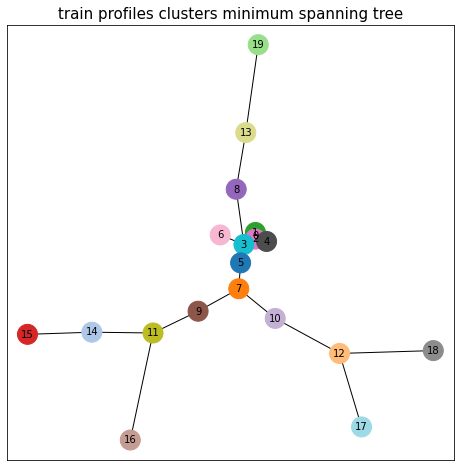

In [3]:
# Load model
model = pickle.load(open(args['filename_kmeans_model'], "rb"))
metric = "euclidean" 

# Plot tree
title = 'train profiles clusters minimum spanning tree' 
centroids = model.cluster_centers_
centroid_distances = distance.cdist( centroids , centroids , metric=metric )
cluster_colors = list(vi.cluster_colors_dict.values())
MST_fig = vi.drawMST(centroid_distances, cluster_colors, title=title , show=False)
MST_fig.savefig(os.path.join(args["figures_dir"],'MST_train_profiles.pdf'))

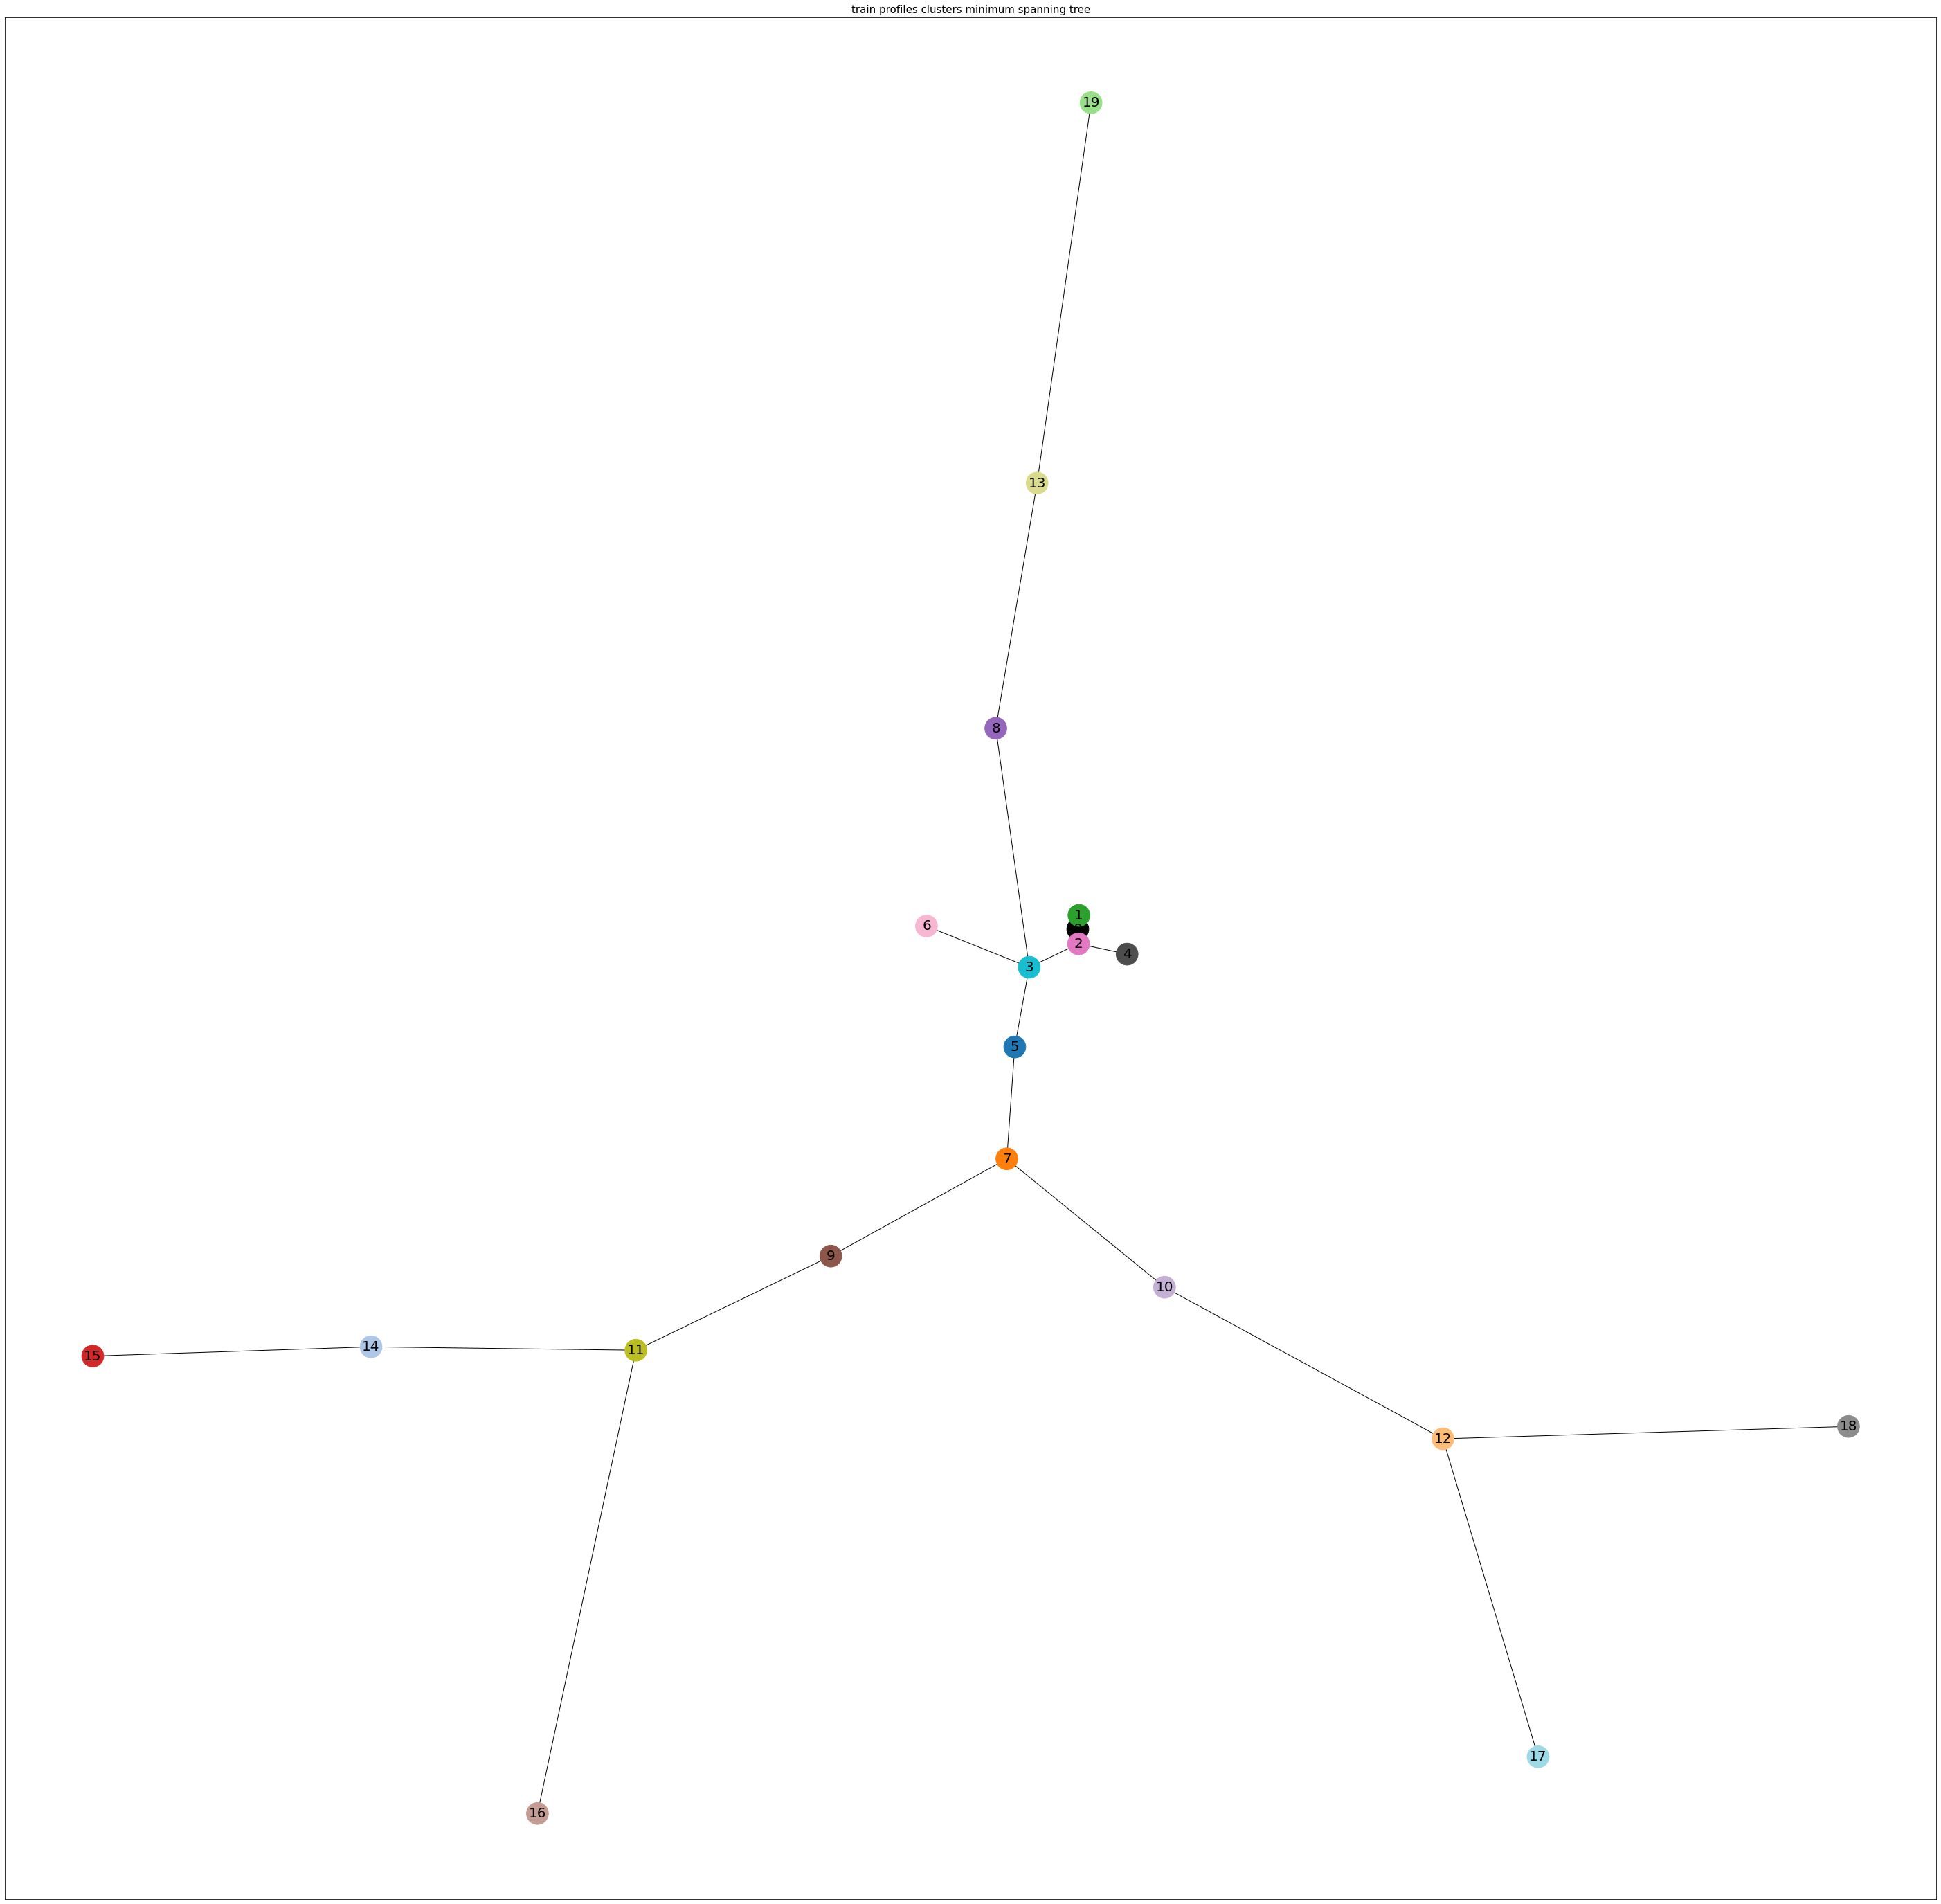

In [4]:
MST_fig_big = vi.drawMST(centroid_distances, cluster_colors, title=title , show=False, figsize = (50,50),  node_size=1000, font_size=20)
MST_fig.savefig(os.path.join(args["figures_dir"],'MST_train_profiles__big.pdf'))

## 2. Define comparison branches

In [5]:
branch_1 = [["Cluster0", "Cluster0"],
            ["Cluster0", "Cluster2"], 
            ["Cluster0", "Cluster8"],
            ["Cluster0", "Cluster19"]]

branch_2 = [["Cluster0", "Cluster0"],
            ["Cluster0", "Cluster3"], 
            ["Cluster0", "Cluster10"],
            ["Cluster0", "Cluster18"]]

branch_3 = [["Cluster0", "Cluster0"],
            ["Cluster0", "Cluster5"], 
            ["Cluster0", "Cluster11"],
            ["Cluster0", "Cluster15"]]
comparison_sets = branch_1 +branch_2 + branch_3

## 3. Morgan Simmilarity distributions relative to cluster 0

#### 3.1 Read data

In [6]:
k_col_ecfp = 'KNNs_ecfp_dice_k'
sim_col_ecfp ='KNNs_ecfp_dice_similarity'

knns_ecfp = f2.load_knns_comparison_sets(comparison_sets, args['Knns_path'], args['Knns_ref_filename_morgan'] )
knns_ecfp = f2.correct_same_cluster_nn( knns_ecfp, k_col_ecfp) 

#### 3.2 Plot distributions

In [7]:
from importlib import reload
reload(f2)

<module 'figure_2' from '/wuppertal/ghpxd/Projects/CellPainting_GAN/publication_git_repo/CPMolGAN/publication_notebooks/mol_generation_from_clustered_trainingset/figure_2.py'>

Cluster0 Cluster0
Cluster0 Cluster2
Cluster0 Cluster8
Cluster0 Cluster19


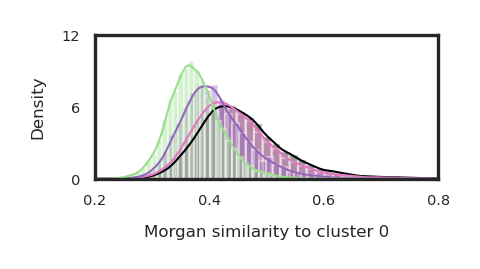

Cluster0 Cluster0
Cluster0 Cluster3
Cluster0 Cluster10
Cluster0 Cluster18


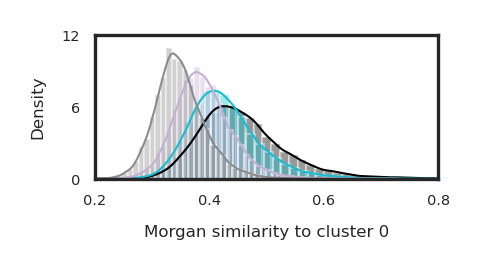

Cluster0 Cluster0
Cluster0 Cluster5
Cluster0 Cluster11
Cluster0 Cluster15


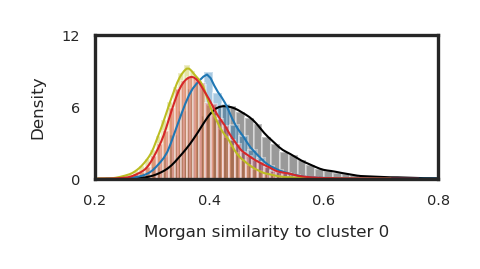

In [8]:
grouped_sets = [branch_1, branch_2, branch_3] 
ref_output_file = os.path.join(args['figures_dir'],'Clusters_Morgan_similarity_branch_IDX.pdf')
K = 1

f2.plot_distributions_comparison_sets( grouped_sets , knns_ecfp, K , k_col_ecfp, sim_col_ecfp,
                               ref_output_file=ref_output_file, 
                               xlims=[0.2,0.8], 
                               ylims=[0,12],
                               xticks=[0.2,0.4,0.6,0.8], 
                               yticks=[0,6,12],
                               xlabel='Morgan similarity to cluster 0'
                              )

## 4. Molecular embedding Similarity distributions relative to cluster 0

#### 4.1 Read data

In [9]:
K = 1
comparison_sets = branch_1+branch_2+branch_3
sim_col_emb = 'KNNs_MolEmb_cosine_similarity'
k_col_emb = 'KNNs_MolEmb_cosine_k'

knns_emb = f2.load_knns_comparison_sets(comparison_sets, args['Knns_path'],  
                                        args['Knns_ref_filename_molemb'].replace('METRIC',metric) )
knns_emb = f2.correct_same_cluster_nn( knns_emb, k_col_emb) 

#### 4.2 Plot distributions

Cluster0 Cluster0
Cluster0 Cluster2
Cluster0 Cluster8
Cluster0 Cluster19


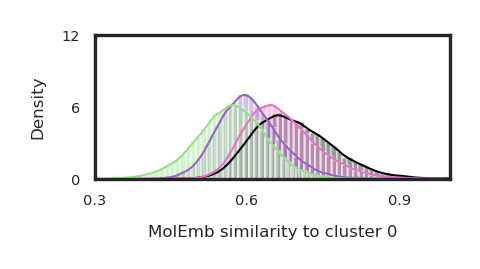

Cluster0 Cluster0
Cluster0 Cluster3
Cluster0 Cluster10
Cluster0 Cluster18


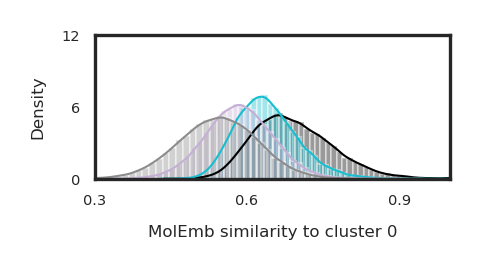

Cluster0 Cluster0
Cluster0 Cluster5
Cluster0 Cluster11
Cluster0 Cluster15


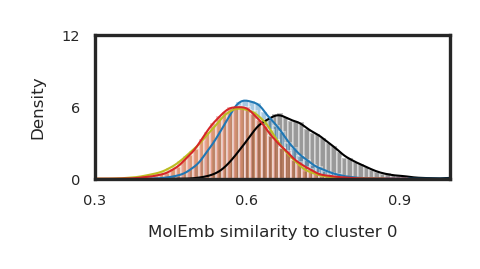

In [10]:
grouped_sets = [branch_1, branch_2, branch_3] 
ref_output_file = os.path.join(args['figures_dir'],'Clusters_MolEmbd_similarity_branch_IDX.pdf')

f2.plot_distributions_comparison_sets( grouped_sets , knns_emb, K , k_col_emb, sim_col_emb,
                               ref_output_file=ref_output_file, 
                               xlims=[0.3,1], 
                               ylims=[0,12],
                               xticks=[0.3,0.6,0.9], 
                               yticks=[0,6,12],
                               xlabel='MolEmb similarity to cluster 0')